In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
import numpy as np


In [63]:
df=pd.read_csv('stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [64]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

           Date  Open  High  Low  Close  Adj Close  Volume
2256 2015-07-15   NaN   NaN  NaN    NaN        NaN     NaN
5131 2004-02-12   NaN   NaN  NaN    NaN        NaN     NaN


In [65]:
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'])

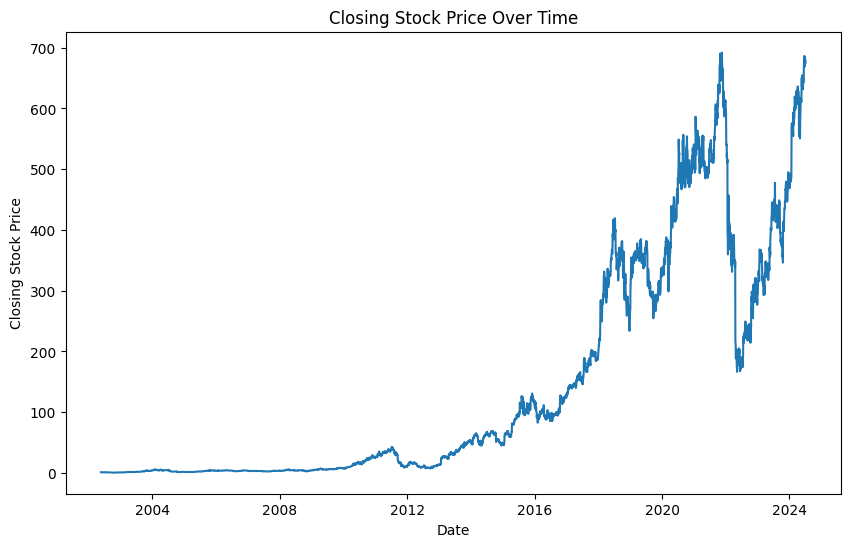

In [66]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

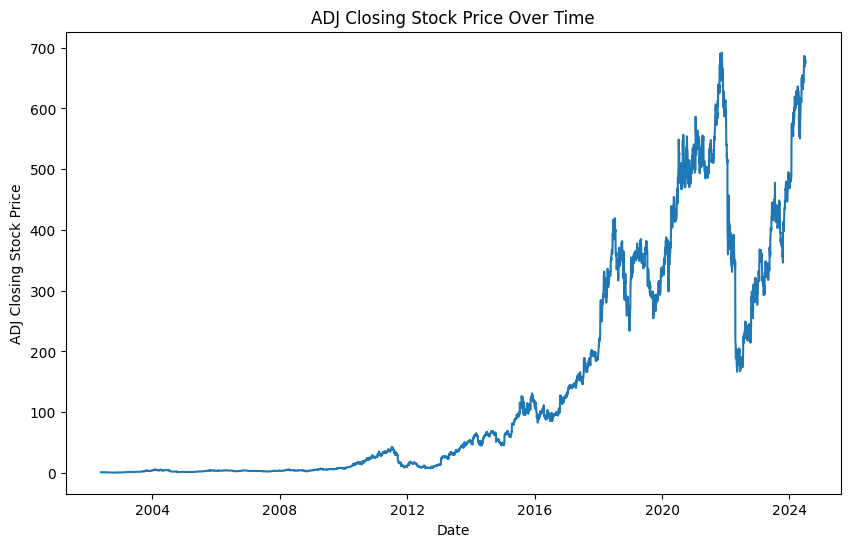

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Adj Close', data=df)
plt.title('ADJ Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('ADJ Closing Stock Price')
plt.show()

In [68]:
# data must be scaled before studying the outliers and such
columns_to_scale = ['Close','Adj Close']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

<Axes: >

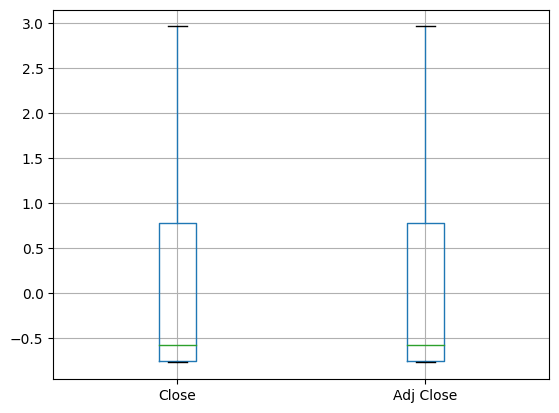

In [69]:
df.boxplot(column=['Close',	'Adj Close'])
#represents no outliers

1. Date
Significance:

Time Reference: Indicates the specific day the trading data was recorded. Essential for tracking stock performance over time.
Historical Analysis: Allows for the examination of trends and patterns in stock prices and trading volumes over various time periods.
Event Correlation: Helps correlate stock price movements with specific events, such as earnings reports, economic news, or geopolitical events.
Seasonal Trends: Identifying recurring trends during certain periods (e.g., end of quarter, holiday season).
2. Open
Significance:

Opening Price: The first price at which a stock is traded when the market opens for the day.
Market Sentiment: Reflects investor sentiment and expectations at the start of the trading day.
Gap Analysis: The difference between the closing price of the previous day and the opening price of the current day can indicate overnight sentiment and potential market movements.
Volatility Indicator: Significant differences between the opening and closing prices may indicate volatility.
3. High
Significance:

Daily High Price: The highest price at which a stock was traded during the trading day.
Market Strength: Indicates the maximum price buyers were willing to pay for the stock during the day.
Resistance Levels: Can be used to identify potential resistance levels, where the stock price faces selling pressure.
Price Action: Provides insights into the stock’s intraday price action and volatility.
4. Low
Significance:

Daily Low Price: The lowest price at which a stock was traded during the trading day.
Market Weakness: Indicates the minimum price sellers were willing to accept for the stock during the day.
Support Levels: Can be used to identify potential support levels, where the stock price finds buying interest.
Price Action: Provides insights into the stock’s intraday price action and volatility.
5. Close
Significance:

Closing Price: The last price at which a stock was traded when the market closes for the day.
Market Sentiment: Reflects investor sentiment and market consensus at the end of the trading day.
Daily Performance: Used to calculate the daily return and performance of the stock.
Benchmarking: The closing price is often used as a reference point for comparing future performance and calculating indicators.
6. Adj Close (Adjusted Close)
Significance:

True Value Reflection: Adjusted for corporate actions like dividends, stock splits, and new stock offerings. Provides a more accurate reflection of the stock’s value over time.
Total Return Analysis: Important for long-term investors as it accounts for total returns including dividends.
Consistent Historical Data: Ensures consistency in historical data for better trend analysis and comparison.
Benchmarking: Useful for benchmarking the stock’s performance against indices or other stocks, considering all returns.
7. Volume
Significance:

Trading Activity: The total number of shares or contracts traded during a specific period (e.g., daily).
Liquidity Indicator: Higher volume indicates higher liquidity, making it easier to buy or sell the stock without significantly affecting its price.
Market Interest: High volume can signal strong investor interest or activity in the stock.
Price Movement Confirmation: Volume is used to confirm price movements. A price increase with high volume is more likely to be sustained than one with low volume.
Trend Strength: Helps determine the strength of a trend. High volume during uptrends or downtrends can indicate the trend's strength.
Breakouts and Reversals: High volume can signal breakouts from trading ranges or trend reversals, providing potential entry or exit points for traders.

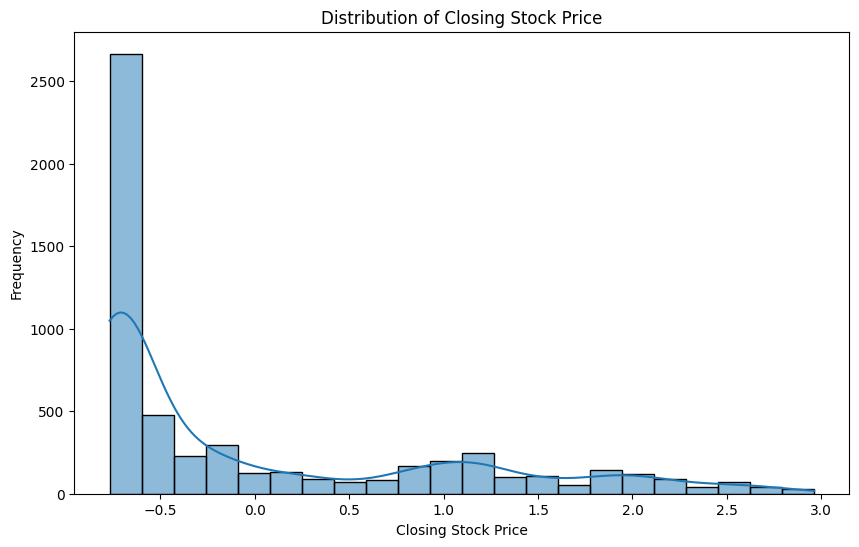

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

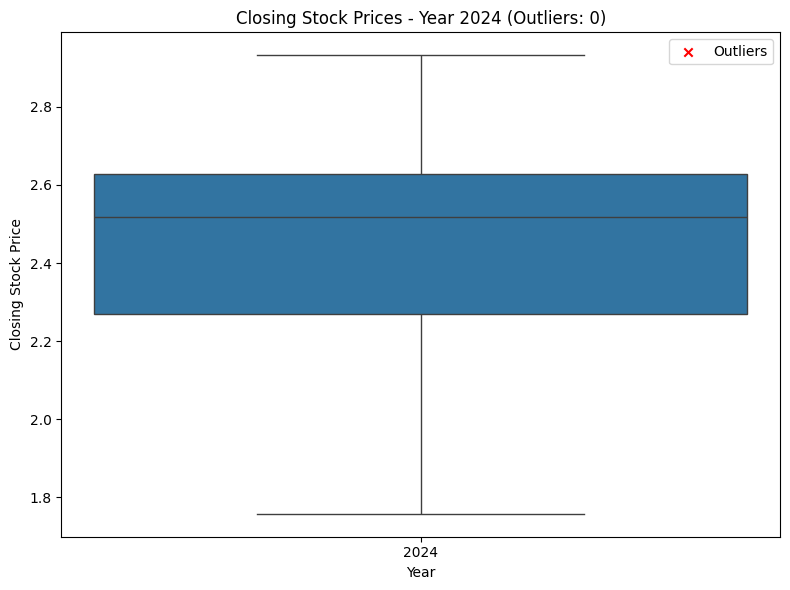

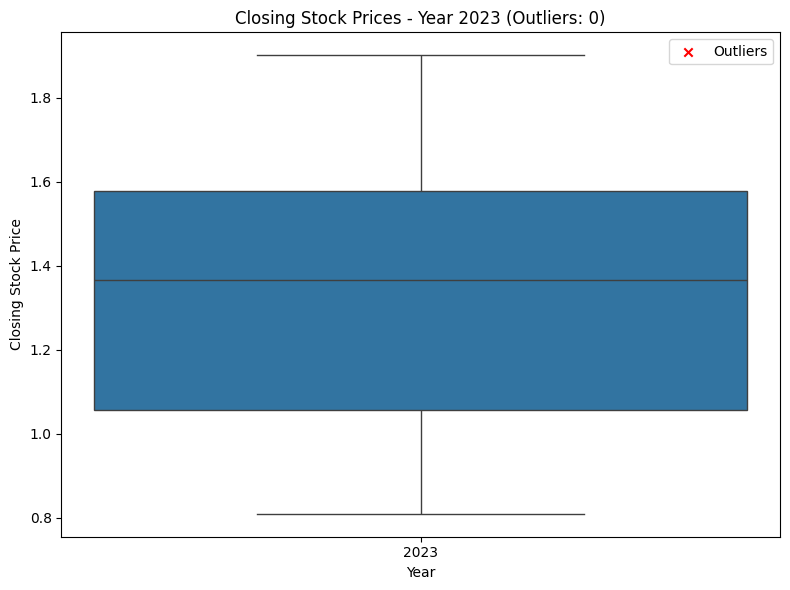

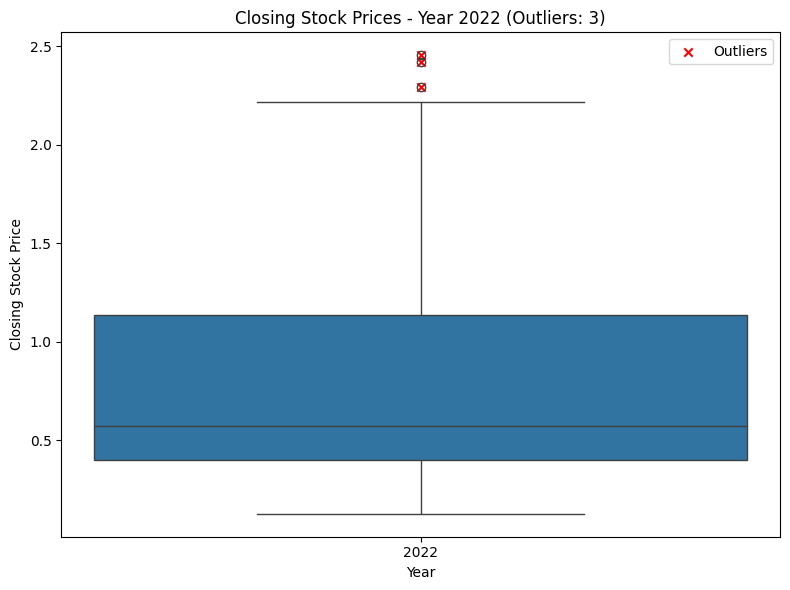

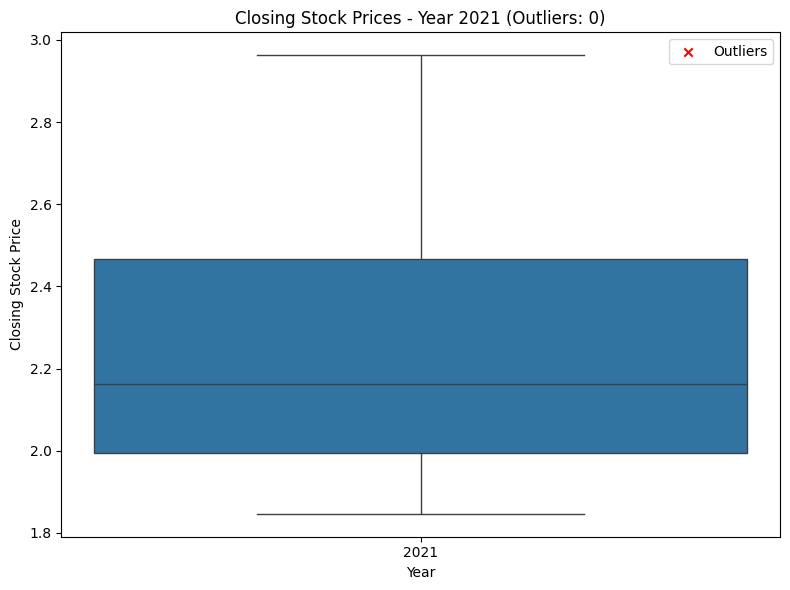

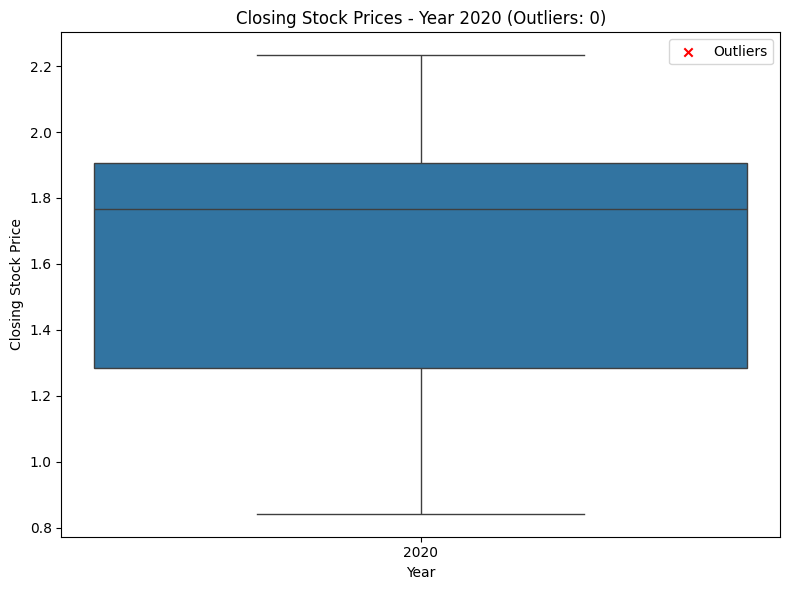

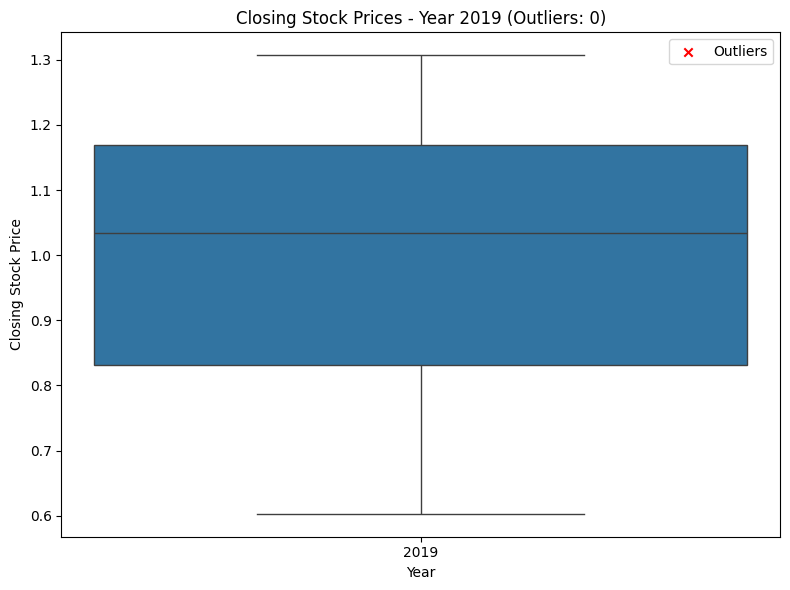

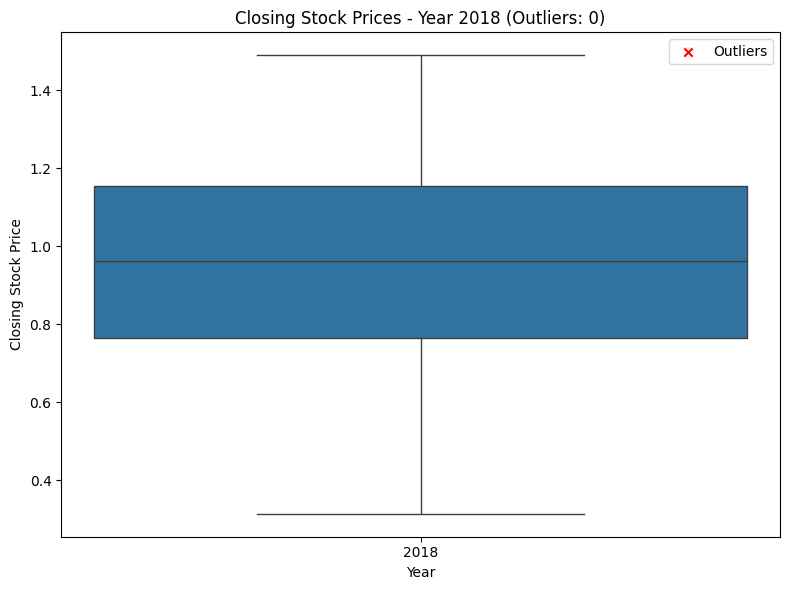

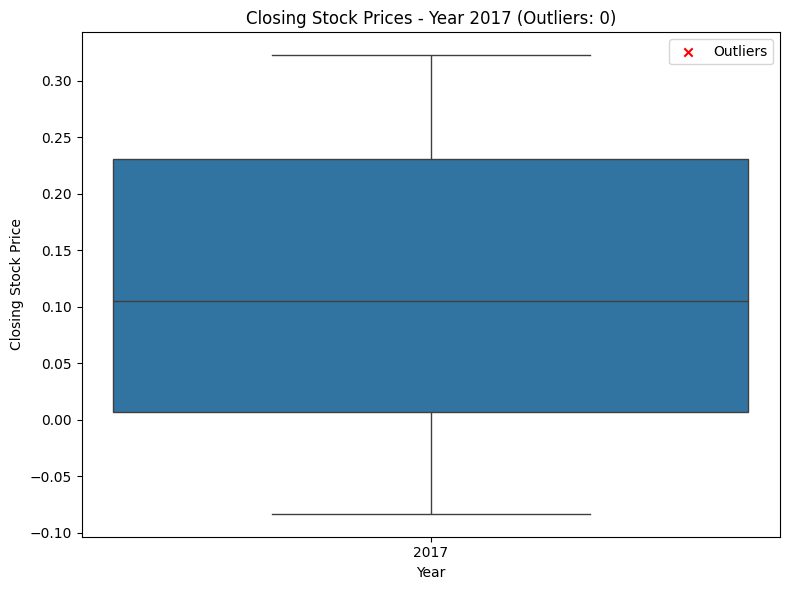

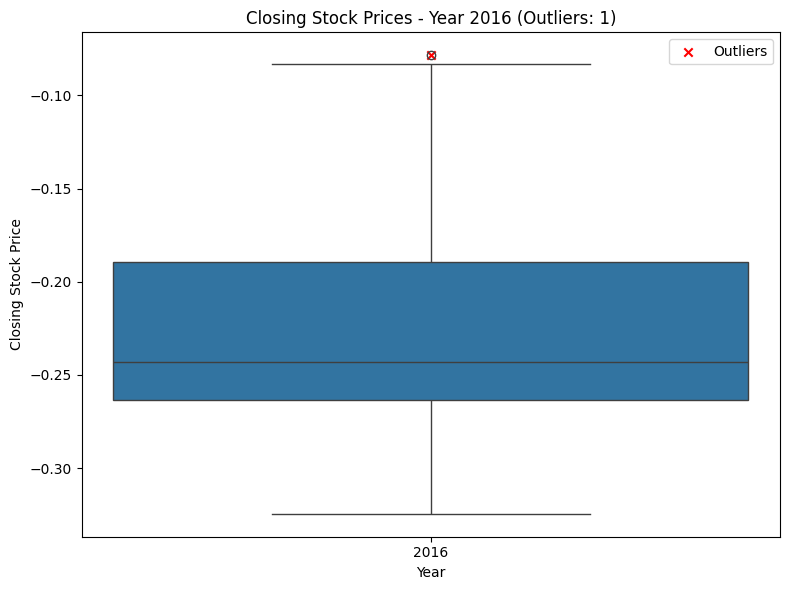

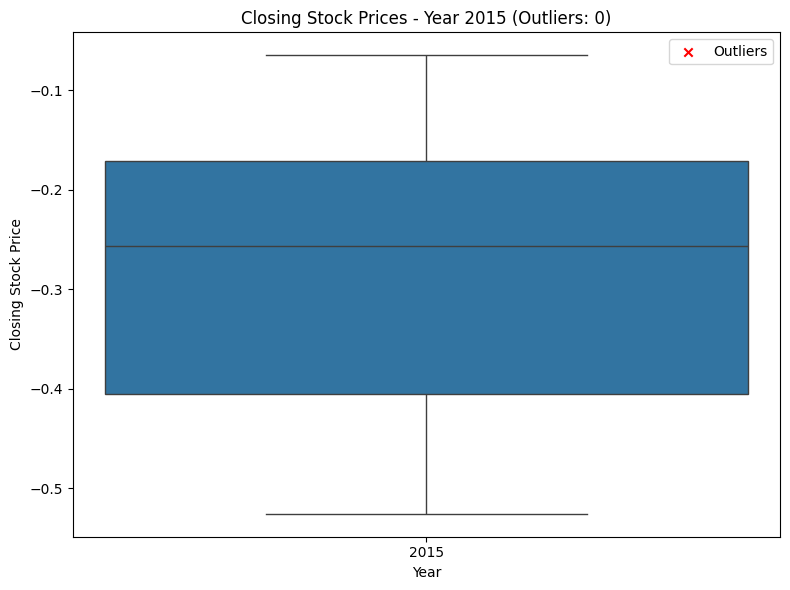

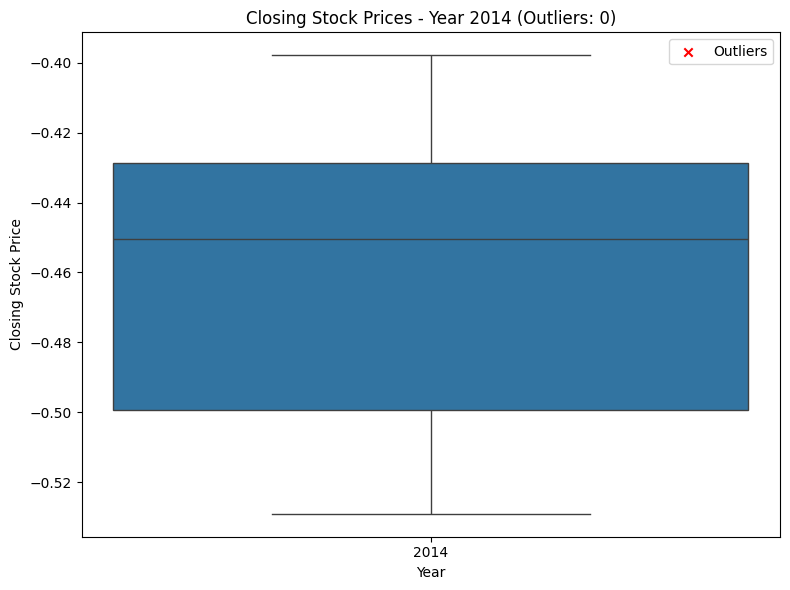

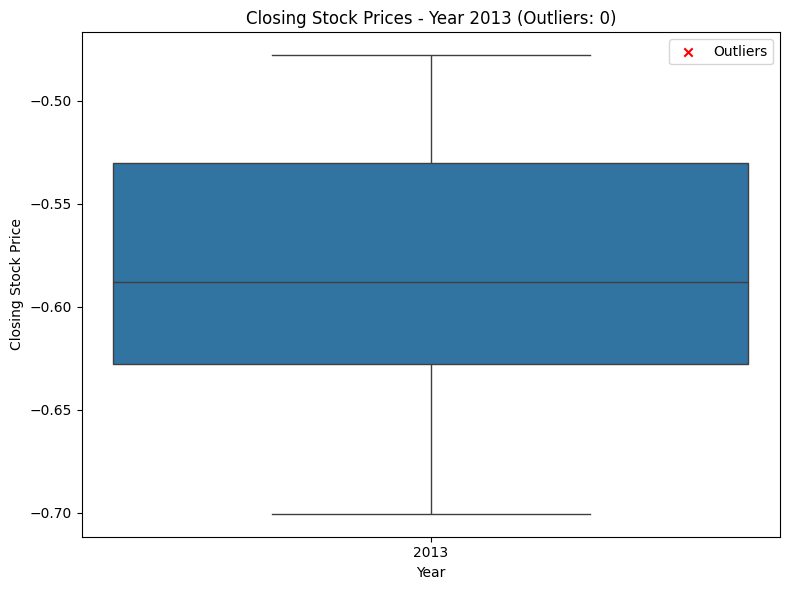

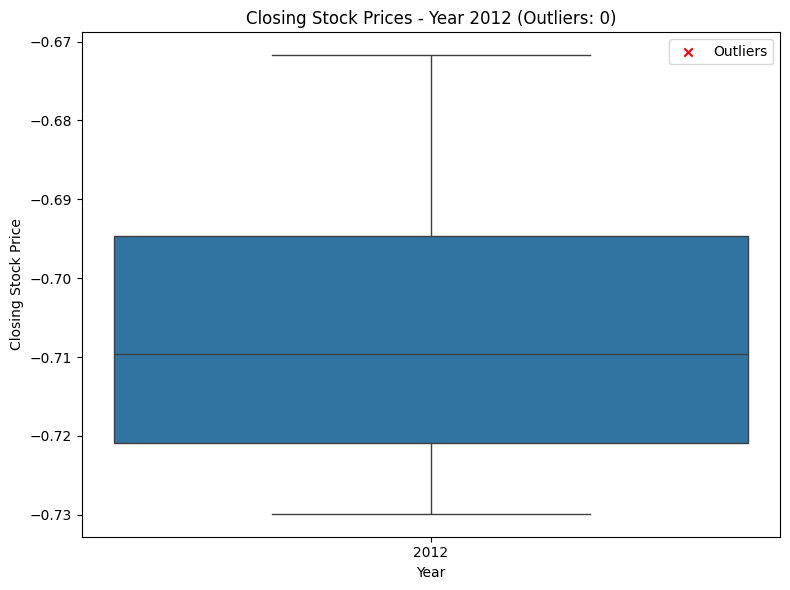

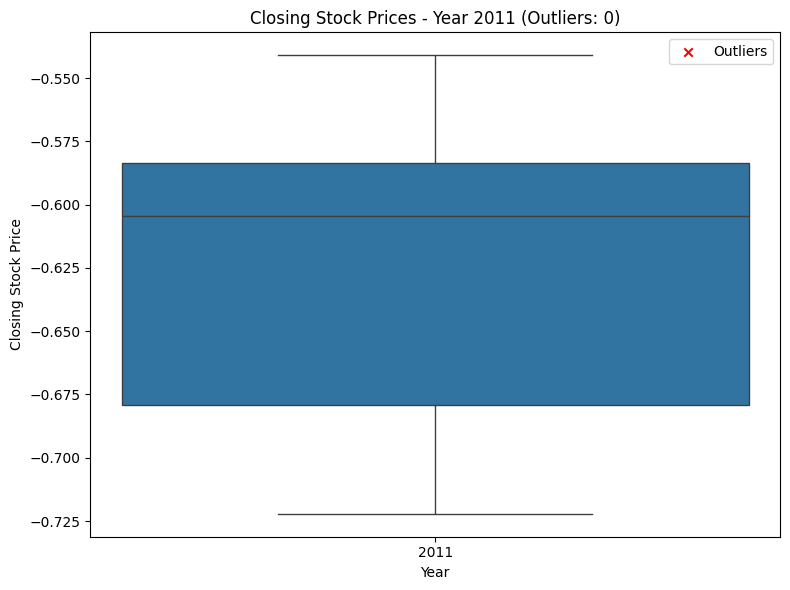

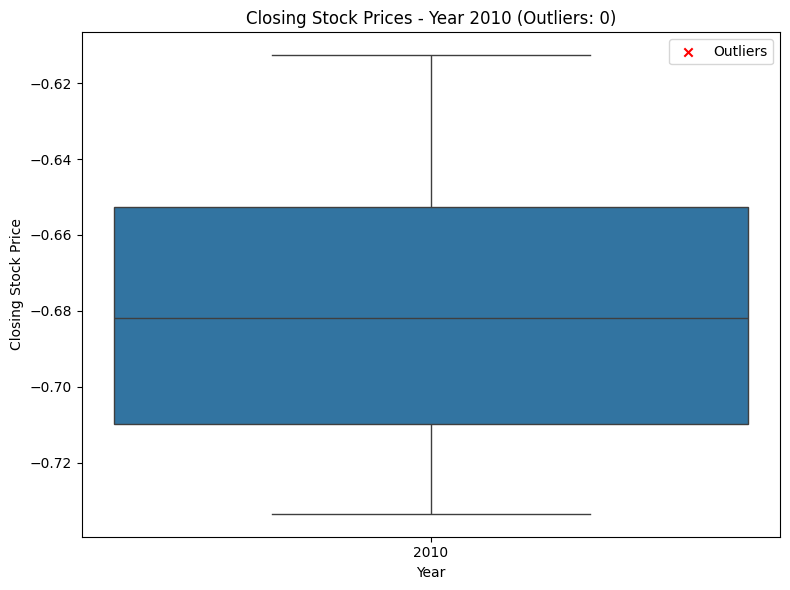

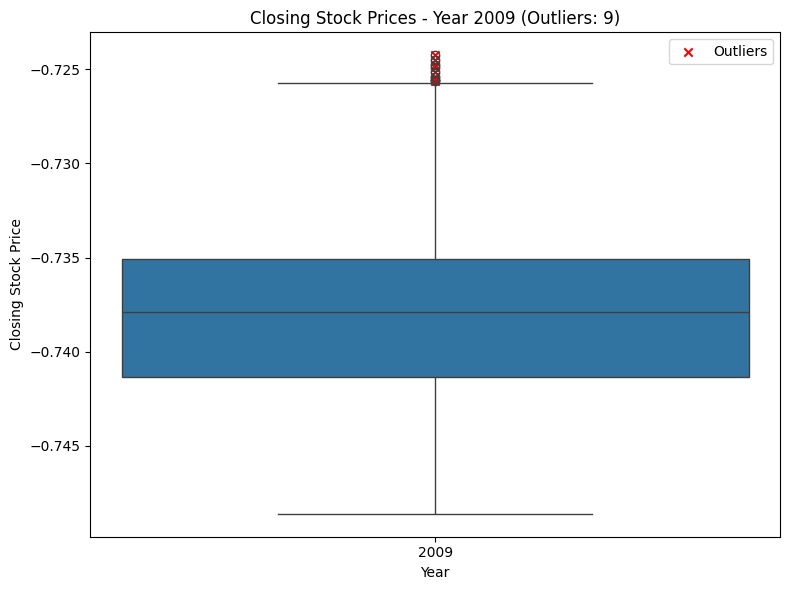

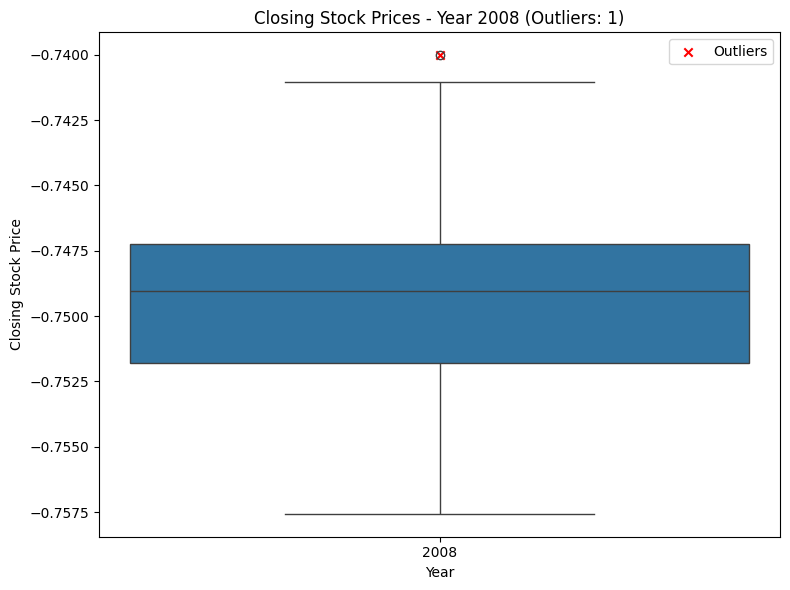

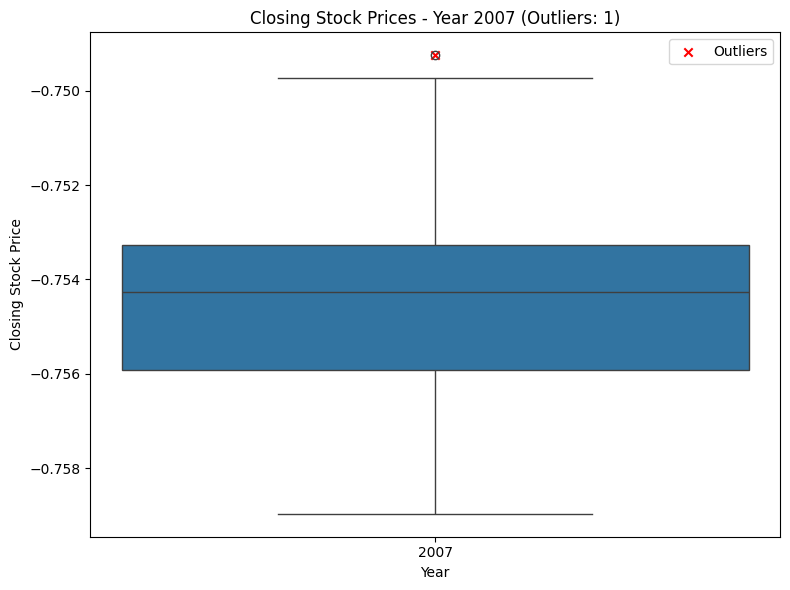

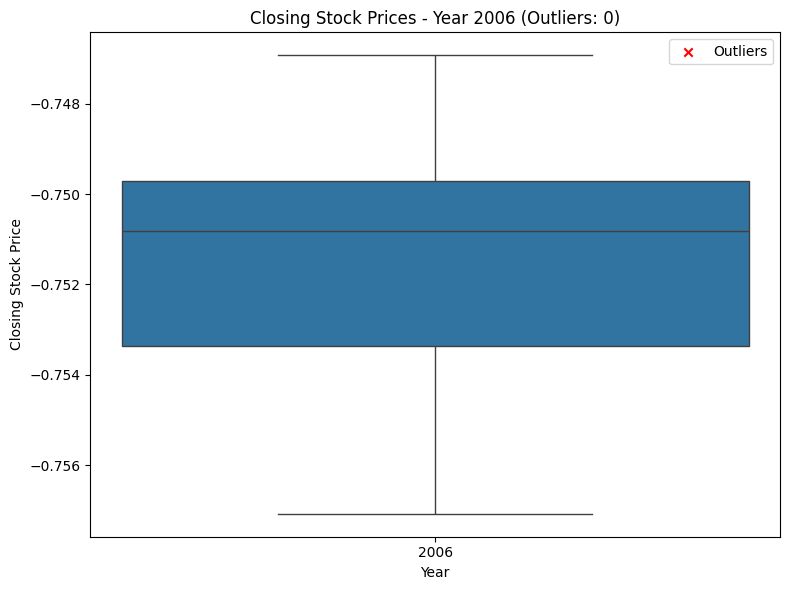

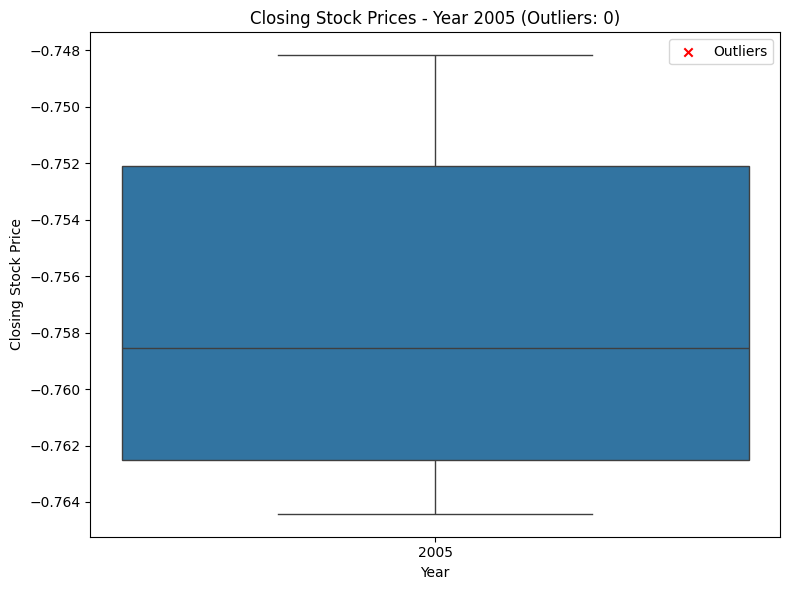

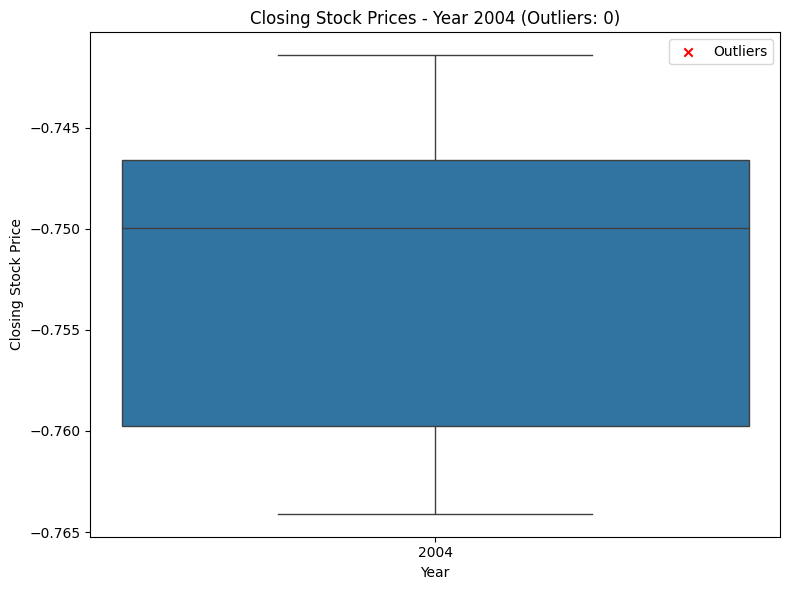

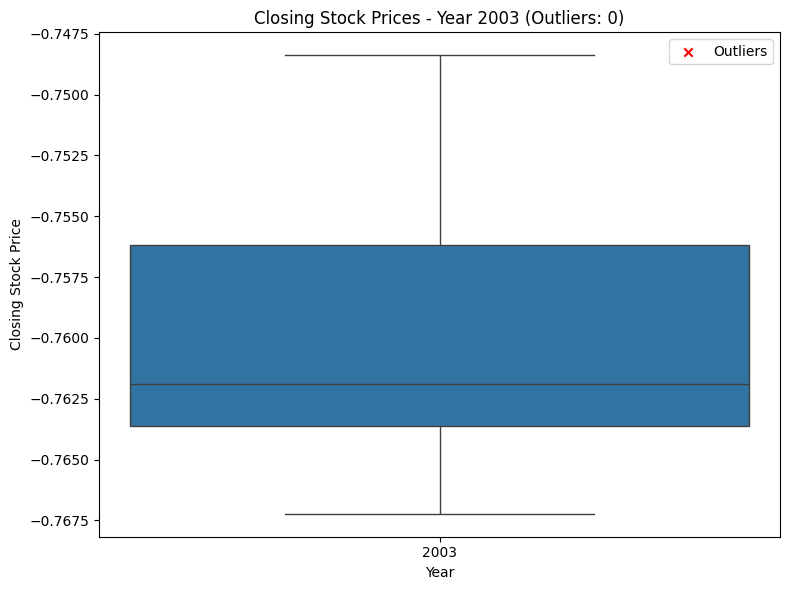

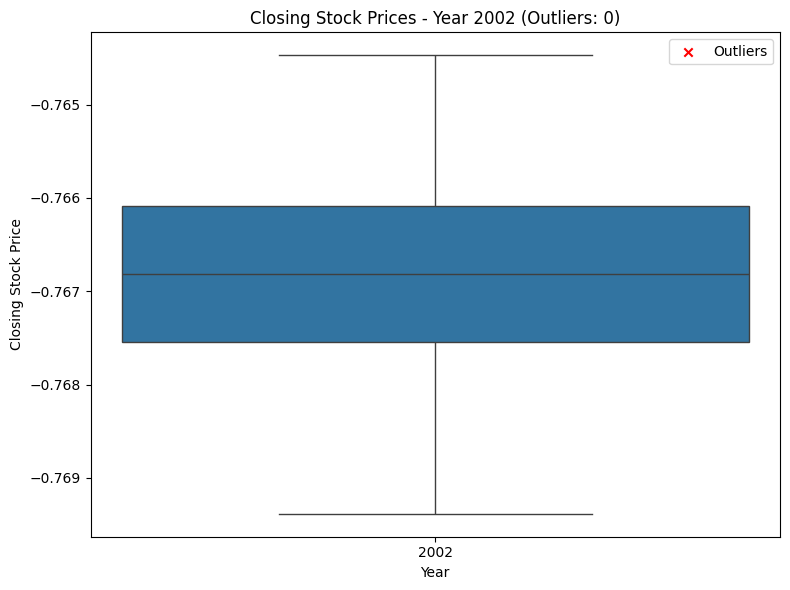

In [71]:
df['year'] = df['Date'].dt.year
def detect_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Calculate number of outliers for each year
outliers_count = df.groupby('year')['Close'].apply(lambda x: detect_outliers(x).sum())

# Plot box plots with outliers marked
plt.figure(figsize=(12, 8))

for year in df['year'].unique():
    data_year = df[df['year'] == year]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='year', y='Close', data=data_year)
    plt.scatter(x=np.repeat(0, outliers_count[year]), y=data_year.loc[detect_outliers(data_year['Close']), 'Close'], color='r', marker='x', label='Outliers')
    plt.title(f'Closing Stock Prices - Year {year} (Outliers: {outliers_count[year]})')
    plt.xlabel('Year')
    plt.ylabel('Closing Stock Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [72]:
df_no_outliers = pd.DataFrame()

for year in df['year'].unique():
    data_year = df[df['year'] == year]
    outliers = detect_outliers(data_year['Close'])
    data_year_no_outliers = data_year[~outliers]
    df_no_outliers = pd.concat([df_no_outliers, data_year_no_outliers], axis=0)

# Reset index of the new DataFrame
df_no_outliers = df_no_outliers.reset_index(drop=True)

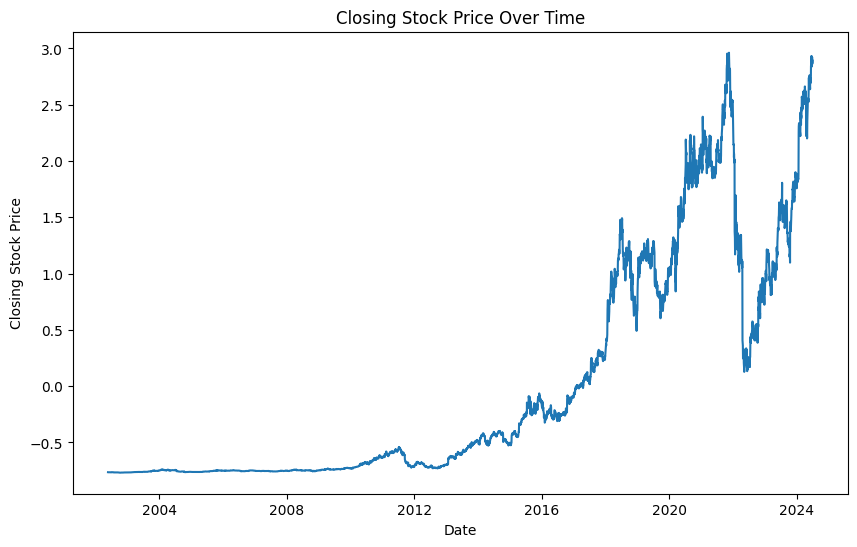

In [73]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df_no_outliers)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

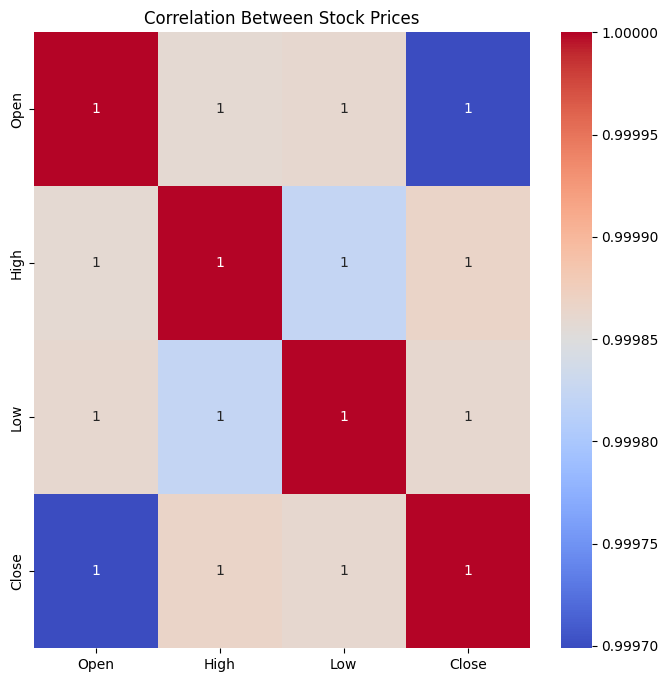

In [74]:
corr = df_no_outliers[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

In [75]:
df_no_outliers.to_csv('Cleaned_stock_data.csv', index=True)